In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("2019-Nov.csv")
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67501979 entries, 0 to 67501978
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.5+ GB
None

Missing values:
 event_time              0
event_type              0
product_id              0
category_id             0
category_code    21898171
brand             9224078
price                   0
user_id                 0
user_session           10
dtype: int64


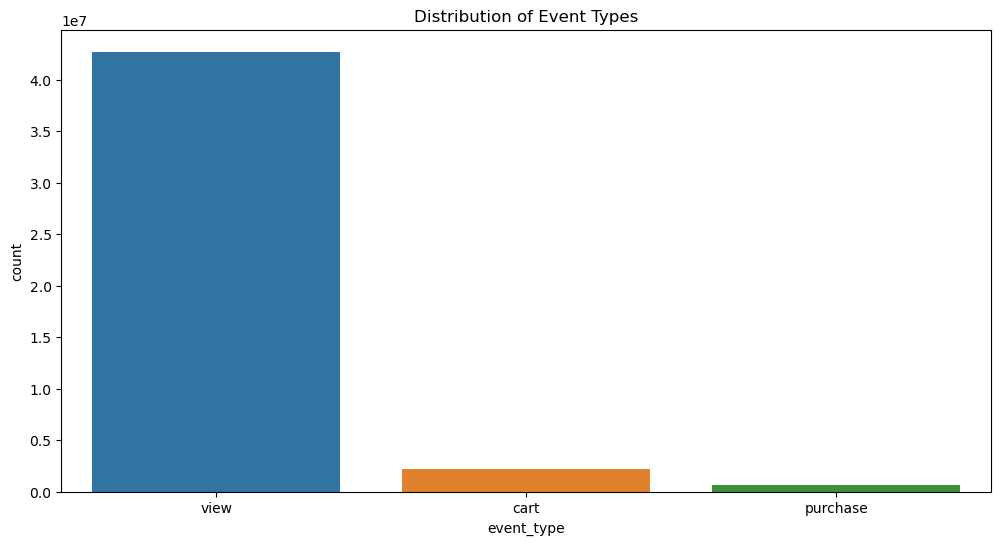

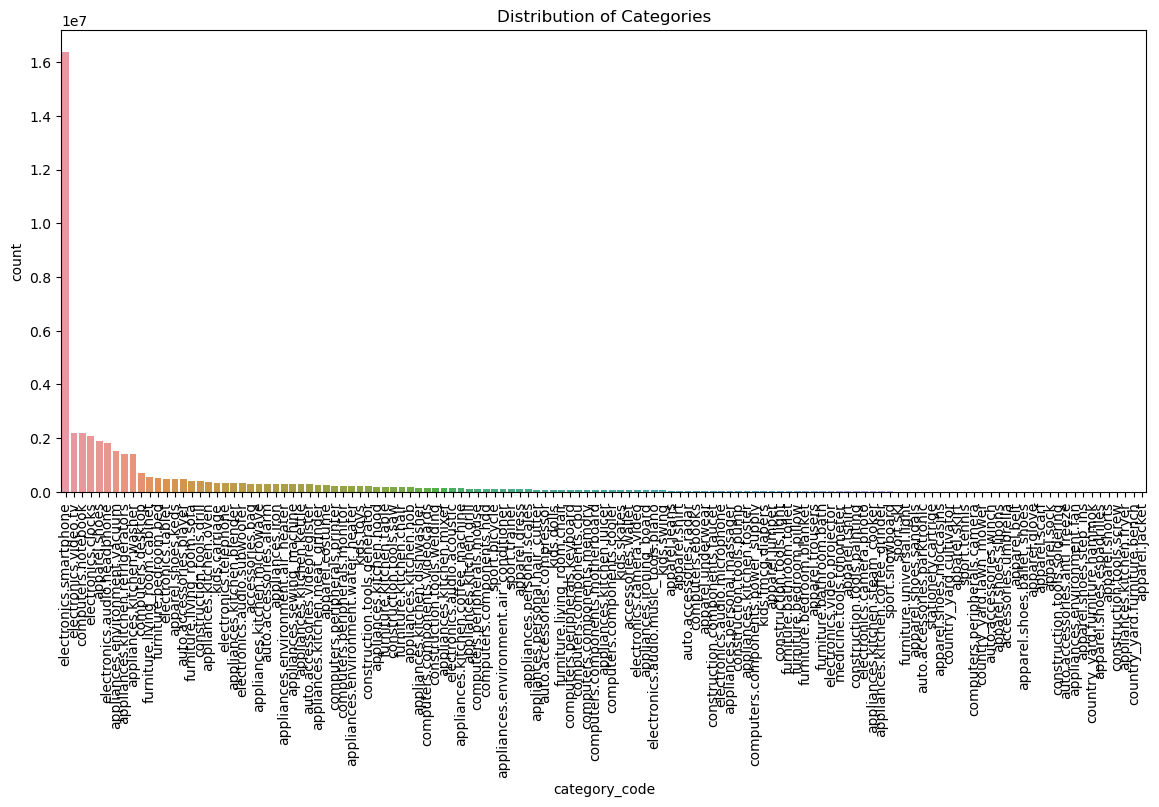


Average Price per Category:
 category_code
electronics.camera.photo        780.474653
electronics.video.projector     730.559776
computers.notebook              724.272491
furniture.living_room.sofa      623.692216
computers.desktop               603.994822
                                   ...    
auto.accessories.anti_freeze     19.941837
accessories.umbrella             19.564119
construction.tools.soldering     13.003273
kids.fmcg.diapers                12.984164
apparel.shorts                   11.006718
Name: price, Length: 129, dtype: float64

Total Revenue per Event Type:
 event_type
view        1.485276e+10
cart        7.752742e+08
purchase    2.453144e+08
Name: price, dtype: float64


In [4]:
print(df.info())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Data Cleaning: Handle missing values
df = df.dropna(subset=['category_code'])  # Drop rows with missing category_code

# Data Visualization
plt.figure(figsize=(12, 6))

# Plot the distribution of event types
sns.countplot(x='event_type', data=df)
plt.title('Distribution of Event Types')
plt.show()

# Plot the distribution of categories
plt.figure(figsize=(14, 6))
sns.countplot(x='category_code', data=df, order=df['category_code'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Categories')
plt.show()

# Statistical Analysis
# Calculate the average price per category
avg_price_per_category = df.groupby('category_code')['price'].mean().sort_values(ascending=False)
print("\nAverage Price per Category:\n", avg_price_per_category)

# Calculate the total revenue per event type
total_revenue_per_event_type = df.groupby('event_type')['price'].sum().sort_values(ascending=False)
print("\nTotal Revenue per Event Type:\n", total_revenue_per_event_type)

In [7]:
df.describe()

,product_id,category_id,price,user_id
count,4.560381e+07,4.560381e+07,4.560381e+07,4.560381e+07
mean,8.156831e+06,2.056866e+18,3.480707e+02,5.388769e+08
std,1.504005e+07,1.863348e+16,3.788937e+02,2.289063e+07
min,1.000365e+06,2.053014e+18,0.000000e+00,2.951588e+07
25%,1.005112e+06,2.053014e+18,1.027100e+02,5.165208e+08
50%,2.701416e+06,2.053014e+18,2.059000e+02,5.354267e+08
75%,6.400290e+06,2.053014e+18,4.550100e+02,5.615941e+08
max,1.000285e+08,2.187708e+18,2.574070e+03,5.799699e+08


In [6]:
df["brand"].unique

<bound method Series.unique of 0            xiaomi
1            janome
3                lg
4            xiaomi
5                hp
             ...   
67501972      bosch
67501975      baden
67501976    samsung
67501977    samsung
67501978      apple
Name: brand, Length: 45603808, dtype: object>